In [1]:
import numpy as np  # numpy是矩阵和数组进行运算或其他处理时所需用到的函数库
import matplotlib.pyplot as plt  # matplotlib是图像处理所需用到的函数库
from uuid import uuid4
import os
import random
import shutil

In [3]:
shutil.rmtree('./dist')
shutil.rmtree('./test_data')
shutil.rmtree('./train_data')
os.mkdir('./dist')
os.mkdir('./train_data')
os.mkdir('./test_data')
try:
    os.remove('./test_data.csv')
    os.remove('./train_data.csv')
except Exception:
    pass

In [4]:
data_file = open(r"./digits.csv")  # open("文件路径") 该函数用于打开.csv文件，并分配给data_file变量方便使用
data_list = data_file.readlines()  # readlines()函数用于读取.csv文件并将其读入到data_list变量中
data_file.close()  # 关闭.csv文件，为了防止之后的处理中不小心对原始.csv文件进行修改
# len(data_list)  # len(变量名)用于检测读取的文件长度
# print(data_list[0])  # 运行该语句会直接显示.csv文件中第一个数组的内容

max_list = []
min_list = []
average_list = []
variance_list = []

test_cnt = 0
total_cnt = len(data_list)

In [5]:

for index, item in enumerate(data_list):
    all_values = [s.strip() for s in item.split(',')]  # split()函数将第1条数据进行拆分，以‘，’为分界点进行拆分

    image_array = np.asfarray(all_values[:-1]).reshape((8, 8))  # asfarray()函数将all_values中的前64个数字进行重新排列
    image_array_back = np.asfarray(all_values[:-1])

    # 最大
    line_max = np.amax(image_array_back)
    max_list.append(line_max)
    # 最小
    line_min = np.amin(image_array_back)
    min_list.append(line_min)
    # 平均
    average_list.append(np.average(image_array_back))
    # 方差
    variance_list.append(np.var(image_array_back))
    # reshape()函数可以对数组进行整型，使其成为8×8的二维数组，asfarry()函数可以使其成为矩阵。
    plt.imshow(image_array, cmap='gray_r', vmin=line_min, vmax=line_max,
               interpolation='nearest')  # imshow()函数可以将8×8的矩阵中的数值当做像素值，使其形成图片

    path = '/{}_{}.jpg'.format(str(uuid4()), all_values[-1])
    dist_path = './dist' + path
    # plt.savefig(dist_path)
    if random.choice([True, False]) and test_cnt / total_cnt <= 0.3:
        # shutil.copy(dist_path, './test_data' + path)
        test_cnt += 1
        with open('./test_data.csv', 'a+') as csv:
            csv.writelines(item.strip() + "\n")
    else:
        # shutil.copy(dist_path, './train_data' + path)
        with open('./train_data.csv', 'a+') as csv:
            csv.writelines(item.strip() + "\n")
    print(index, '[%.2f%%]' % (index / total_cnt * 100), path)

plt.close()
print('done')

0 [0.00%] /78f0149c-168d-4b13-8b90-129bf301b4b2_0.jpg
1 [0.06%] /d4dd0b11-6fdc-4b55-b7e1-c0c8cbf366f0_1.jpg
2 [0.11%] /e47a7679-6931-4b98-a9f2-f2fc1c217f18_2.jpg
3 [0.17%] /abeefa67-544b-4c7f-b069-9b75d4d947e0_3.jpg
4 [0.22%] /6c3040ab-acfe-44b5-bf4a-8ca6a42090ef_4.jpg
5 [0.28%] /2a1b37e5-4d0b-4fc7-b796-70fce77ab37a_5.jpg
6 [0.33%] /666c88c0-642c-498e-b626-76fc0ec1b252_6.jpg
7 [0.39%] /090145d9-eddc-4a62-8076-bd335cb56aa7_7.jpg
8 [0.45%] /b2be3183-6c94-4497-a45d-56488b617951_8.jpg
9 [0.50%] /6d64bc6b-67ab-4264-8182-2a90f7a3d44a_9.jpg
10 [0.56%] /e43f3f20-f040-471a-8e86-75c35228b1a9_0.jpg
11 [0.61%] /868bbaf7-1a09-4927-9dd6-9b94694f4c81_1.jpg
12 [0.67%] /6a2ef02f-340e-45d2-b574-ff73c795d0a3_2.jpg
13 [0.72%] /6dd05240-702e-4093-92a5-5972888f9a88_3.jpg
14 [0.78%] /5b6f0c63-441b-49d8-8267-93671ad8e4d5_4.jpg
15 [0.83%] /beb76eab-f9c1-49e6-a7d6-c80b25abdf9c_5.jpg
16 [0.89%] /39e11f17-767b-46c6-9012-becd8931334f_6.jpg
17 [0.95%] /a98cc472-db91-4a68-a3c0-5f200c4a0952_7.jpg
18 [1.00%] /e957bde0

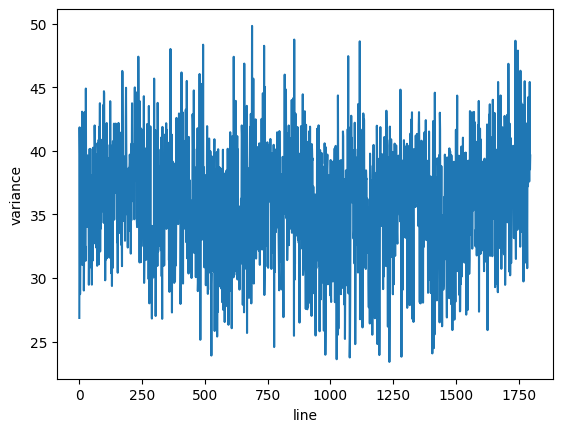

In [6]:

'''
方差折线图
'''
plt.plot([i for i in range(len(variance_list))], variance_list)
plt.xlabel("line")  # 给x轴起名字
plt.ylabel("variance")  # 给y轴起名字
plt.show()
plt.close()


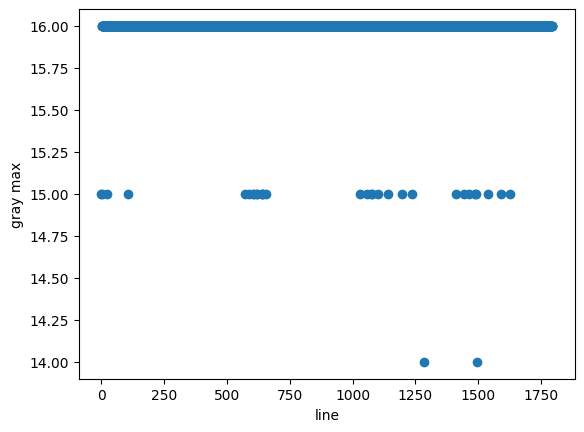

In [7]:

'''
最大值散点图
'''
plt.scatter([i for i in range(len(max_list))], max_list)
plt.xlabel("line")  # 给x轴起名字
plt.ylabel("gray max")  # 给y轴起名字
plt.show()
plt.close()


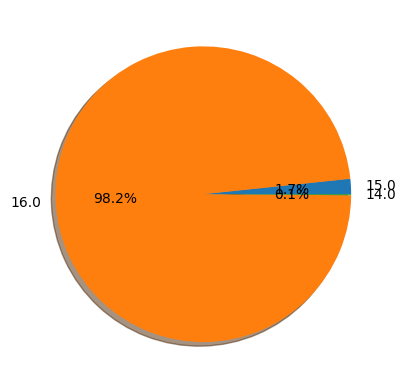

In [8]:

'''
最大值饼图
'''
max_map = {}
for i in max_list:
    if max_map.get(i) is None:
        max_map[i] = 0
    max_map[i] += 1
plt.pie(max_map.values(), labels=max_map.keys(), shadow=True, autopct='%1.1f%%')
plt.show()
plt.close()
